In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import zipfile
zipfile1='/content/drive/MyDrive/Colab Notebooks/facial_expression.zip'
unzipdirectory='/content/'
with zipfile.ZipFile(zipfile1,'r') as zip_ref:
   zip_ref.extractall(unzipdirectory)

In [4]:
from keras.models import Sequential
from keras.layers import Convolution2D,MaxPooling2D,Dense,Dropout,Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf

In [5]:
image=cv2.imread('/content/Dataset/train/anger/10005903.png')
image.shape

(48, 48, 3)

In [6]:
# Initialize image data generator with rescaling

validation_data_gen = ImageDataGenerator(rescale=1./255)


In [7]:
from keras.preprocessing.image import ImageDataGenerator

# Define the data augmentation parameters
Train_datagen = ImageDataGenerator(
    rotation_range=10,      # Degree range for random rotations
    width_shift_range=0.1,  # Fraction of total width for random horizontal shift
    height_shift_range=0.1, # Fraction of total height for random vertical shift
    shear_range=0.1,        # Shear angle in counter-clockwise direction as radians
    zoom_range=0.1,         # Range for random zoom (e.g., 0.2 => 0.8 to 1.2)
    horizontal_flip=True,   # Randomly flip images horizontally
    rescale=1./255,
    fill_mode='nearest'# Rescale pixel values to [0, 1]
)


In [20]:
# Preprocess all train images
train_generator = Train_datagen.flow_from_directory(
        '/content/Dataset/train',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical',
        shuffle='True'
        )

# Preprocess all test images
validation_generator = validation_data_gen.flow_from_directory(
        '/content/Dataset/test',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical',
        shuffle='True')

Found 32298 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.


In [23]:
import cv2
from keras.layers.convolutional.conv2d_transpose import Conv2D
from tensorflow.keras import layers,models,regularizers
#creating model structure


EmotionModel = Sequential()

EmotionModel.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48,1)))
EmotionModel.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
#kernel_regularizer=regularizers.l2(0.01)
EmotionModel.add(layers.MaxPooling2D(pool_size=(2, 2)))
EmotionModel.add(layers.Dropout(0.25))


EmotionModel.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
#kernel_regularizer=regularizers.l2(0.01)
EmotionModel.add(layers.MaxPooling2D(pool_size=(2, 2)))
EmotionModel.add(layers.Dropout(0.25))



EmotionModel.add(Flatten())


EmotionModel.add(layers.Dense(1024, activation='relu'))
EmotionModel.add(layers.Dropout(0.5))
EmotionModel.add(layers.Dense(7, activation='softmax'))

cv2.ocl.setUseOpenCL(False)
EmotionModel.compile(optimizer =Adam(learning_rate=0.0001, decay=1e-6), loss='categorical_crossentropy', metrics=['accuracy'])
print(EmotionModel.summary())
#EmotionModel.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0000001, decay=1e-6), metrics=['accuracy'])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 46, 46, 32)        320       
                                                                 
 conv2d_21 (Conv2D)          (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 22, 22, 64)       0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 22, 22, 64)        0         
                                                                 
 conv2d_22 (Conv2D)          (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 10, 10, 128)      0         
 g2D)                                                 

In [25]:
emotion_model_info = EmotionModel.fit(
        train_generator,
        epochs=100,
        validation_data=validation_generator,
)

Epoch 1/100
505/505 [==============================] - 29s 57ms/step - loss: 0.9129 - accuracy: 0.6613 - val_loss: 0.9202 - val_accuracy: 0.6687
Epoch 2/100
505/505 [==============================] - 29s 58ms/step - loss: 0.9126 - accuracy: 0.6605 - val_loss: 0.9204 - val_accuracy: 0.6701
Epoch 3/100
505/505 [==============================] - 31s 62ms/step - loss: 0.9115 - accuracy: 0.6626 - val_loss: 0.9258 - val_accuracy: 0.6629
Epoch 4/100
505/505 [==============================] - 29s 57ms/step - loss: 0.9041 - accuracy: 0.6643 - val_loss: 0.9225 - val_accuracy: 0.6612
Epoch 5/100
505/505 [==============================] - 29s 57ms/step - loss: 0.9032 - accuracy: 0.6619 - val_loss: 0.9280 - val_accuracy: 0.6620
Epoch 6/100
505/505 [==============================] - 29s 57ms/step - loss: 0.9011 - accuracy: 0.6634 - val_loss: 0.9207 - val_accuracy: 0.6715
Epoch 7/100
505/505 [==============================] - 29s 57ms/step - loss: 0.9038 - accuracy: 0.6623 - val_loss: 0.9309 - val_ac

In [26]:
test_loss, test_acc =EmotionModel.evaluate(validation_generator, verbose=2)

print('\nTest accuracy:', test_acc)
EmotionModel.save('emotion_detection_model_100epochs.h5')

57/57 - 1s - loss: 0.9250 - accuracy: 0.6863 - 974ms/epoch - 17ms/step

Test accuracy: 0.6862635612487793


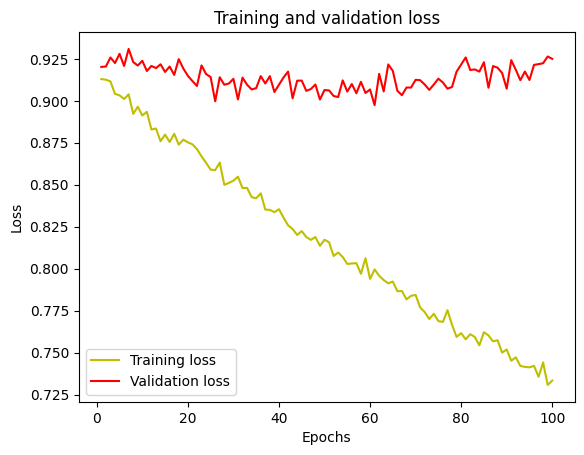

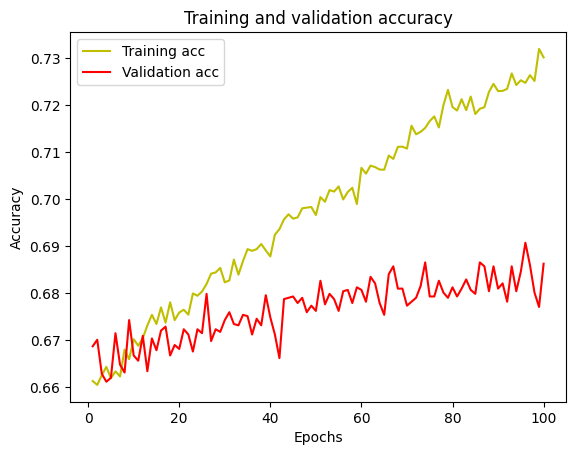

In [27]:
#plot the training and validation accuracy and loss at each epoch
loss = emotion_model_info.history['loss']
val_loss = emotion_model_info.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = emotion_model_info.history['accuracy']
#acc = history.history['accuracy']
val_acc = emotion_model_info.history['val_accuracy']
#val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [49]:
from keras.models import load_model
import numpy as np
my_model = load_model('emotion_detection_model_100epochs.h5', compile=False)

#Generate a batch of images
test_img, test_lbl = validation_generator.__next__()
predictions=my_model.predict(test_img)

predictions = np.argmax(predictions, axis=1)
test_labels = np.argmax(test_lbl, axis=1)

2/2 [==============================] - 0s 7ms/step


Accuracy =  0.734375


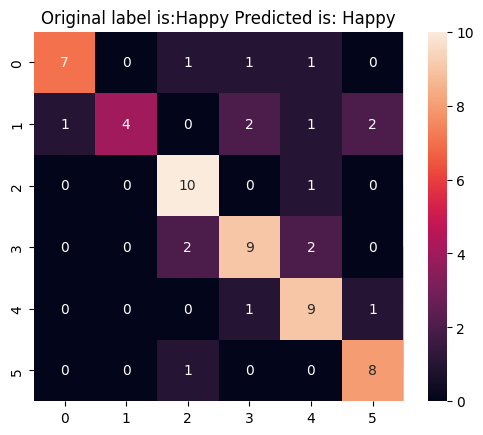

In [51]:
from sklearn import metrics
from sklearn import metrics
import seaborn as sns
import random
print ("Accuracy = ", metrics.accuracy_score(test_labels, predictions))

#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, predictions)
#print(cm)
import seaborn as sns
sns.heatmap(cm, annot=True)

class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']
#Check results on a few select images
n=random.randint(0, test_img.shape[1] - 1)
image = test_img[n]
orig_labl = class_labels[test_labels[n]]
pred_labl = class_labels[predictions[n]]
plt.imshow(image[:,:,0], cmap='gray')
plt.title("Original label is:"+orig_labl+" Predicted is: "+ pred_labl)
plt.show()

In [33]:
#save in a jason file
model_json=EmotionModel.to_json()
with open("emotion_model.json","w")as json_file:
  json_file.write(model_json)

In [34]:
#now saving trained model weights
EmotionModel.save_weights('emotion_model.h5')